In [1]:
#pip install --upgrade pip
#%pip install seaborn

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats


In [3]:
#importing data
df = pd.read_csv(r'C:\Users\ADMIN\Documents\Loan Risk\Loan_Risk_Prediction_Challenge_DATAMONDAYVIEWS\data\Loan prediction mini dataset.csv')
df.head()


,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,13116,23,88000,MORTGAGE,2.0,MEDICAL,6625,11.22,0,0.08,Y,3
1,1742,23,30000,RENT,0.0,PERSONAL,1925,12.18,0,0.06,N,2
2,27672,32,160000,MORTGAGE,9.0,DEBTCONSOLIDATION,12000,7.88,0,0.07,N,8
3,24694,29,75000,OWN,3.0,HOMEIMPROVEMENT,12000,7.51,0,0.16,N,5
4,1994,22,28800,RENT,2.0,VENTURE,14000,7.90,1,0.49,N,2


## Data Description

In [4]:
#summary of the data -> 8145 rows, 12 columns
df.shape

(8145, 12)

In [5]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,8145.000000,8145.000000,8.145000e+03,7909.000000,8145.000000,7383.000000,8145.000000,8145.000000,8145.000000
mean,16269.966974,27.689748,6.528496e+04,4.728790,9695.656845,11.040731,0.218171,0.171769,5.767342
std,9394.610528,6.229731,5.278421e+04,3.991919,6389.975388,3.226149,0.413029,0.106168,3.981448
min,4.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8134.000000,23.000000,3.860400e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16280.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24325.000000,30.000000,7.800000e+04,7.000000,12500.000000,13.470000,0.000000,0.230000,8.000000
max,32579.000000,144.000000,1.900000e+06,41.000000,35000.000000,21.740000,1.000000,0.770000,30.000000


The columns *emp_length* and *rate* have missing values

In [6]:
#drop irrelevant cols
df.drop(["Id"], axis=1, inplace=True)

In [7]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,23,88000,MORTGAGE,2.0,MEDICAL,6625,11.22,0,0.08,Y,3
1,23,30000,RENT,0.0,PERSONAL,1925,12.18,0,0.06,N,2
2,32,160000,MORTGAGE,9.0,DEBTCONSOLIDATION,12000,7.88,0,0.07,N,8
3,29,75000,OWN,3.0,HOMEIMPROVEMENT,12000,7.51,0,0.16,N,5
4,22,28800,RENT,2.0,VENTURE,14000,7.90,1,0.49,N,2


In [8]:
#Checking for data types
df.dtypes

Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

Crucial columns are in the right data type

In [9]:
#add spacings to the intent column
replacements = {
    'DEBTCONSOLIDATION': 'DEBT CONSOLIDATION',
    'HOMEIMPROVEMENT': 'HOME IMPROVEMENT'
}

df['Intent'] = df['Intent'].replace(replacements)
df['Intent'].value_counts()

Intent
EDUCATION             1636
MEDICAL               1495
VENTURE               1400
PERSONAL              1396
DEBT CONSOLIDATION    1310
HOME IMPROVEMENT       908
Name: count, dtype: int64

In [10]:
#find missing values
df.isnull().sum()

Age                 0
Income              0
Home                0
Emp_length        236
Intent              0
Amount              0
Rate              762
Status              0
Percent_income      0
Default             0
Cred_length         0
dtype: int64

In [11]:
#remove every row (axis=0) that has "any" Null value in it.
df=df.dropna(how='any', axis=0)

In [12]:
df.isnull().sum()

Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

There are no null values

In [13]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,23,88000,MORTGAGE,2.0,MEDICAL,6625,11.22,0,0.08,Y,3
1,23,30000,RENT,0.0,PERSONAL,1925,12.18,0,0.06,N,2
2,32,160000,MORTGAGE,9.0,DEBT CONSOLIDATION,12000,7.88,0,0.07,N,8
3,29,75000,OWN,3.0,HOME IMPROVEMENT,12000,7.51,0,0.16,N,5
4,22,28800,RENT,2.0,VENTURE,14000,7.90,1,0.49,N,2


## EDA

In [22]:
df.corr()

ValueError: could not convert string to float: 'MORTGAGE'

(20.0, 70.0)

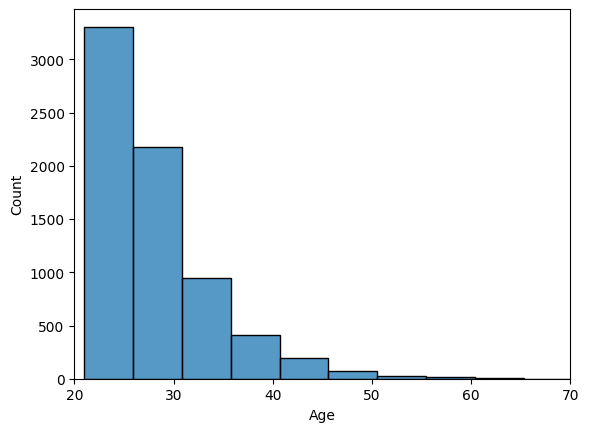

In [14]:
#Loan distribution per
fig = sns.histplot(data=df, x='Age', binwidth=5)
fig.set_xlim(20, 70)

In [15]:
#correlation between age and income
df_scatter = df
df_scatter['Income'] = df_scatter['Income']/4


(20.0, 70.0)

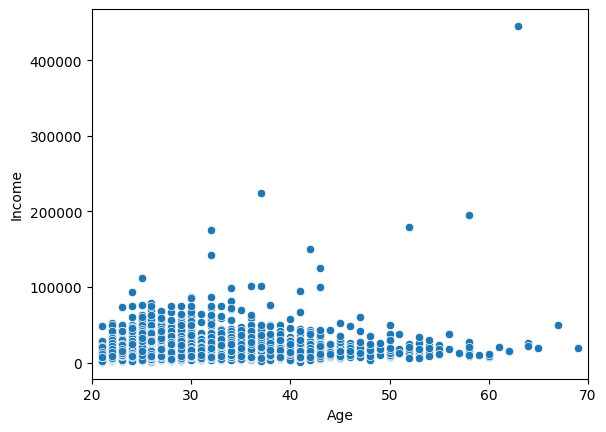

In [19]:
fig = sns.scatterplot(data=df_scatter, x='Age', y='Income')
fig.set_xlim(20,70)

(20.0, 70.0)

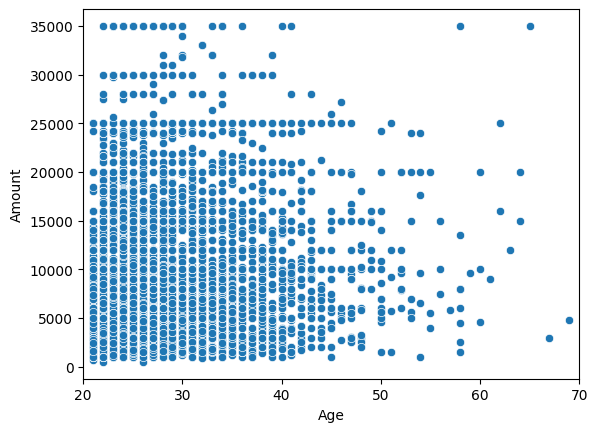

In [26]:
fig = sns.scatterplot(data=df_scatter, x='Age', y='Amount')
fig.set_xlim(20,70)
